In [14]:
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [8]:
data = scipy.io.loadmat('/kaggle/input/fdataset/Fdataset (1).mat')

In [9]:
# Explore the keys to understand the structure of your dataset
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'didr', 'disease', 'drug', 'Wrname', 'Wdname'])


In [11]:
# Extract the matrices
didr = data['didr']
disease = data['disease']
drug = data['drug']

In [22]:
# Initialize an empty list to hold the feature vectors
X = []

# Iterate over each disease and drug to create feature vectors
for i in range(didr.shape[0]):  # For each disease
    for j in range(didr.shape[1]):  # For each drug
        # Concatenate the feature vector for the disease with the feature vector for the drug
        feature_vector = np.concatenate((disease[i], drug[:, j]))
        X.append(feature_vector)

# Convert the list of feature vectors to a numpy array
X = np.array(X)

# Flatten the didr matrix to create labels
y = didr.flatten()

# The rest of your code follows...


In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)

In [27]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [28]:
# Predictions
predictions = mlp.predict(X_test)

In [29]:
# Evaluation
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')
print(classification_report(y_test, predictions))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36749
           1       0.47      0.28      0.35       373

    accuracy                           0.99     37122
   macro avg       0.73      0.64      0.67     37122
weighted avg       0.99      0.99      0.99     37122



In [ ]:
#### DATA VISUALIZATION AND BIPARTITE GRAPH

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

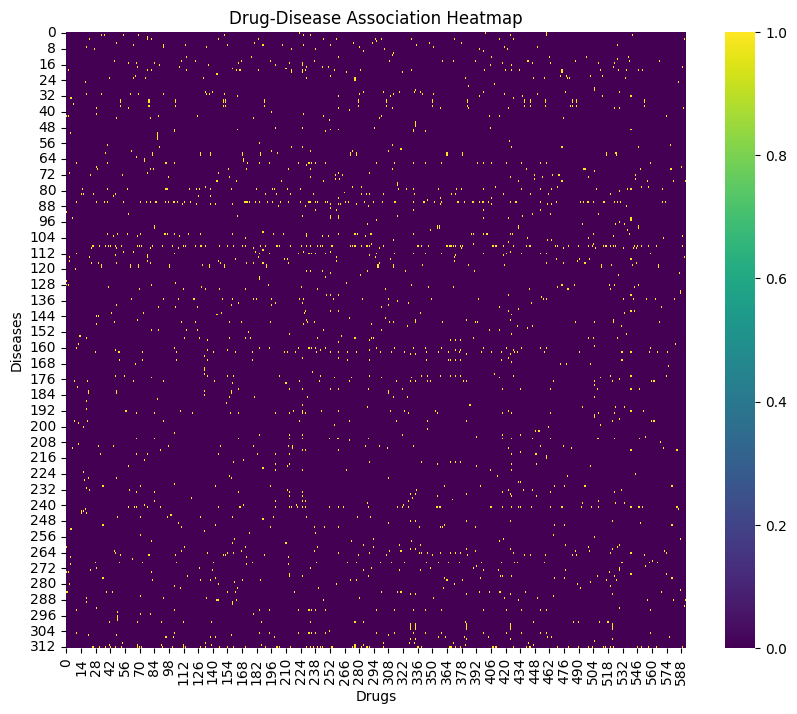

In [39]:
# Extract the didr matrix for visualization
didr = data['didr']

# Heatmap of the didr matrix
plt.figure(figsize=(10, 8))
sns.heatmap(didr, cmap='viridis')
plt.title('Drug-Disease Association Heatmap')
plt.xlabel('Drugs')
plt.ylabel('Diseases')
plt.show()

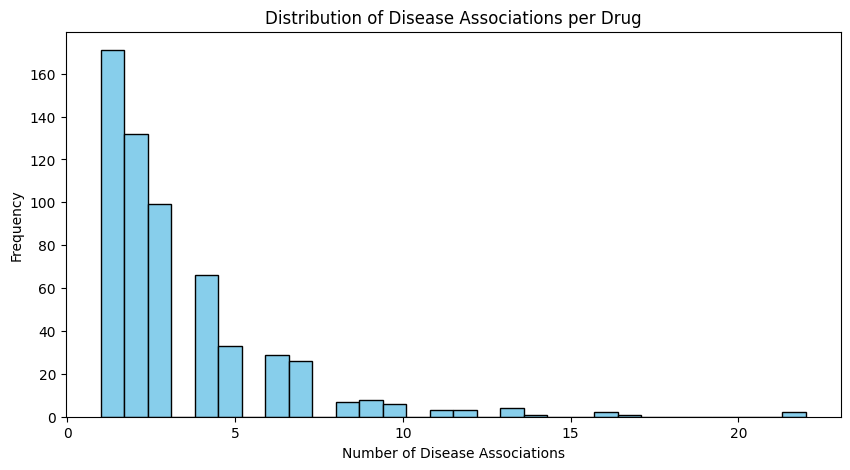

In [40]:
# Histogram of the sum of associations per drug
plt.figure(figsize=(10, 5))
plt.hist(np.sum(didr, axis=0), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Disease Associations per Drug')
plt.xlabel('Number of Disease Associations')
plt.ylabel('Frequency')
plt.show()

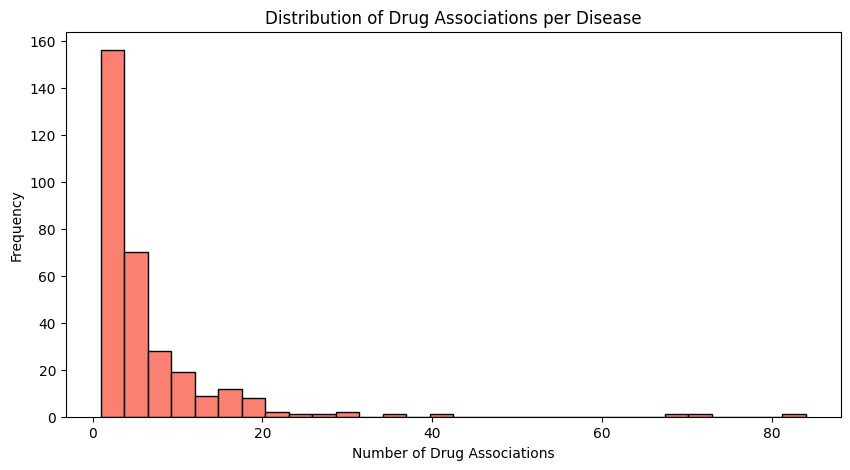

In [41]:
# Histogram of the sum of associations per disease
plt.figure(figsize=(10, 5))
plt.hist(np.sum(didr, axis=1), bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Drug Associations per Disease')
plt.xlabel('Number of Drug Associations')
plt.ylabel('Frequency')
plt.show()

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

In [31]:
# Extract the didr matrix and the names for drugs and diseases
didr = data['didr']
disease_names = data['Wrname'].ravel()  # Assuming this is the correct key for disease names
drug_names = data['Wdname'].ravel()  # Assuming this is the correct key for drug names

In [32]:
# Create a new graph
G = nx.Graph()

In [33]:
# Add nodes with the node attribute "bipartite"
disease_nodes = ['Disease{}'.format(i) for i in range(didr.shape[0])]
drug_nodes = ['Drug{}'.format(i) for i in range(didr.shape[1])]

In [34]:
# Add nodes for the two node sets
G.add_nodes_from(disease_nodes, bipartite=0)
G.add_nodes_from(drug_nodes, bipartite=1)

In [35]:
# Add edges based on the didr matrix (only if the association is non-zero)
# You can set a threshold to reduce the number of edges
threshold = 0.5  # Set this to the appropriate value for your dataset
for i, disease in enumerate(disease_nodes):
    for j, drug in enumerate(drug_nodes):
        if didr[i, j] > threshold:
            G.add_edge(disease, drug, weight=didr[i, j])

In [36]:
# Generate positions for the nodes using the bipartite layout
pos = nx.bipartite_layout(G, disease_nodes)

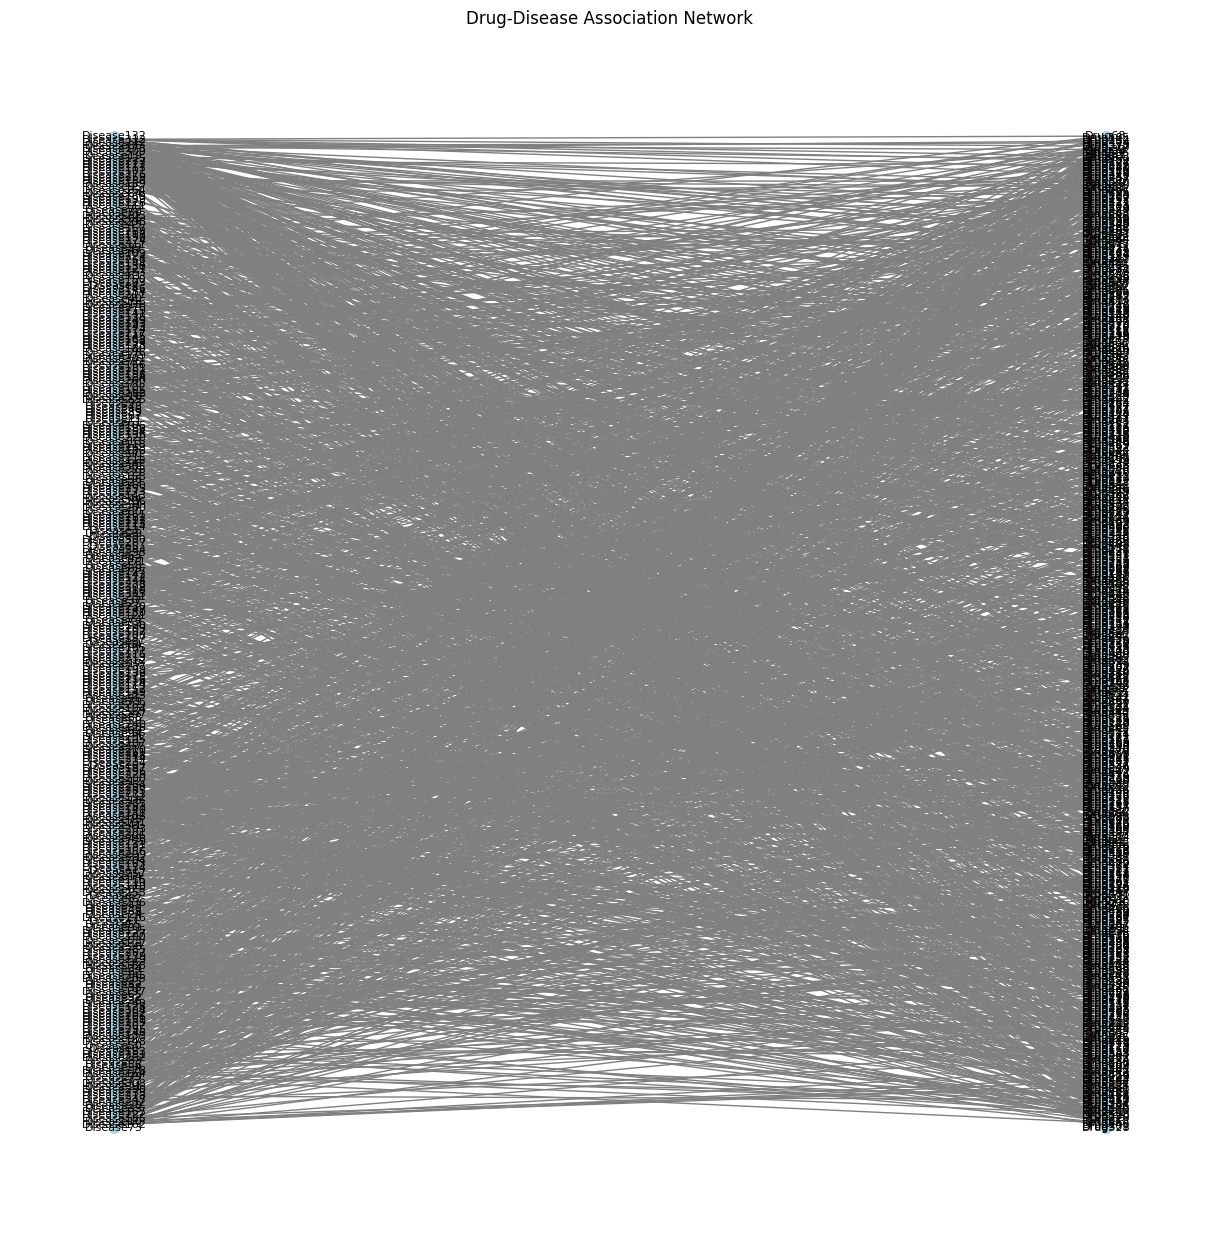

In [37]:
# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=50, font_size=8)
plt.title('Drug-Disease Association Network')
plt.show()